In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from matplotlib import tri

In [43]:
# Question 4: Cross product

# Receives two two-dimensional vectors, a and b, interpreted as three-dimensional vectors lying on the XY plane.
# Returns the cross product between them
def cross(a,b):
    return a[0]*b[1] - a[1]*b[0]

# Receives two line segments, ab and cd, on the XY plane and returns if they intercept or not
def intersect(a,b,c,d):
    ab = np.subtract(b, a)
    ac = np.subtract(c, a)
    ad = np.subtract(d, a)
    
    cd = np.subtract(d, c)
    ca = np.subtract(a, c)
    cb = np.subtract(b, c)
    
    p1 = cross(ab, ac) * cross(ab, ad)
    p2 = cross(cd, ca) * cross(cd, cb)
    
    return p1 < 0 and p2 < 0

# Receives three points, a, b and c, on the XY plane, and returns the oriented area of their parallelogram
def oriented_area(a,b,c):
    o = np.array([0,0])
    
    oa = np.subtract(a,o)
    ob = np.subtract(b,o)
    oc = np.subtract(c,o)
    
    return 0.5 * (cross(oa, ob) + cross(ob, oc) + cross(oc, oa))

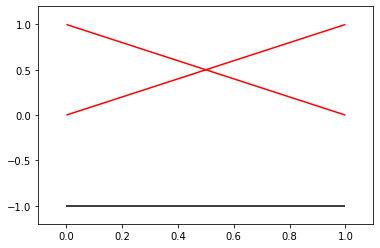

In [24]:
# Visualize Question 4 results:

# Line intersection

# Returns color c1 if ab and cd intersect, and color c2 otherwise
def get_color(a, b, c, d, c1, c2):
    return c1 if intersect(a, b, c, d) else c2

a1 = np.array([0,0])
a2 = np.array([1,1])

b1 = np.array([1,0])
b2 = np.array([0,1])

c1 = np.array([0,-1])
c2 = np.array([1,-1])

a = np.array([a1,a2]).reshape((-1,2))
b = np.array([b1,b2]).reshape((-1,2))
c = np.array([c1,c2]).reshape((-1,2))

# Show line segments that intersect with a as red, black otherwise 
lines = [a, b, c]
int_col = [1,0,0,1]
nint_col = [0,0,0,1]

colors = np.array([int_col, get_color(a1,a2,b1,b2,int_col,nint_col), get_color(a1,a2,c1,c2,int_col,nint_col)])

lc = mc.LineCollection(lines, colors=colors)

fig, ax = plt.subplots()

ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

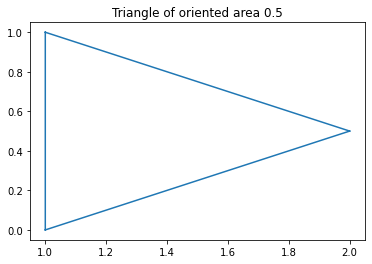

In [45]:
# Oriented area
a = np.array([1,0])
b = np.array([2,0.5])
c = np.array([1,1])

points = np.array([a, b, c]).reshape((3,-1))
indices = [[0, 1, 2]]

tris = tri.Triangulation(points[:,0], points[:,1], triangles=indices)

plt.title(f'Triangle of oriented area {oriented_area(a,b,c)}')
lines = plt.triplot(tris)

In [36]:
# Question 5: Point in polygon

# Intersection algorithm and rotation index algorithm

# Finds the point of intersection between two lines p1p2 and p3p4
def line_intersection(p1, p2, p3, p4):
    [x1,y1] = [p1[0,0], p1[0,1]]
    [x2,y2] = [p2[0,0], p2[0,1]]
    [x3,y3] = [p3[0,0], p3[0,1]]
    [x4,y4] = [p4[0,0], p4[0,1]]
    
    D = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    
    x = ( (x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4) ) / D
    y = ( (x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4) ) / D
    
    return np.array([x,y])

# Returns distance between two points
def distance(p1, p2):
    [x1,y1] = [p1[0,0], p1[0,1]]
    [x2,y2] = [p2[0,0], p2[0,1]]
    
    return math.hypot(x2-x1, y2-y1) 

# Check if point lies on the line
def point_in_line(P, a, b):
    return math.isclose(distance(a, P) + distance(P, b), distance(a, b))

# Receives a point P and a sequence of points p = [p_0, p_1, ... , p_n, p_(n+1)], that forms a closed polygon,
# where p_(n+1) == p_1. Returns -1 if outside, 0 if in frontier, 1 if inside
def point_in_polygon_intersection(P, p):
    n = len(p)-1
    print(n)
    N = 0 # Number of intersections
    [x0, y0] = [P[0,0], P[0,1]] 
    Pn = np.add(P, [1,0]) # We will test the horizontal line that passes by P
    for i in range(0,n):
        xi = p[i,0]
        yi = p[i,1]
        xip1 = p[i+1,0]
        yip1 = p[i+1,1]
        
        if not math.isclose(yi, yip1): # Is not an horizontal line
            [x, y] = line_intersection(p[i], p[i+1], P, Pn) # Check the intersection between test line and one line of the poly
            if math.isclose(x, x0): # If the inter point is the same as the test point, itself lies on the polygon frontier
                return 0
            elif x > x0 and y > min(xi, xip1):
                N += 1
        elif point_in_line(P, p[i], p[i+1]):
            return 0
    odd = N % 2 == 1
    return 1 if odd else -1

3
status -1


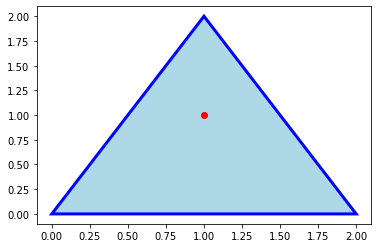

In [39]:
# Visualize Question 5 results:

stat_to_fmt = {
    1: 'go',
    0: 'yo',
    -1: 'ro'
}

def draw_point_in_polygon(P, p, ax):
    status = point_in_polygon_intersection(P, p)
    print(f'status {status}')
    
    ax.plot(P[0,0], P[0,1], stat_to_fmt[status])
    ax.fill(p[:,0], p[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 3)
    
    
fig, ax = plt.subplots()    
draw_point_in_polygon(np.matrix([[1,1]]), np.matrix([[0,0], [2,0], [1,2], [0,0]]), ax)

plt.show()

In [25]:
p = np.matrix([[0,0], [2,0], [1,2], [0,0]])
for i in range(0,3):
    print(p[i])
    x = p[i,1]
    print(x)

[[0 0]]
0
[[2 0]]
0
[[1 2]]
2


In [6]:
x

1